<a href="https://colab.research.google.com/github/deniztahmouresi/interviewTask/blob/develop/InterviewTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration & Exploratory Data Analysis (EDA):

1.   Dimension exploration
2.   Sample visualization
3.   Distribution visualoization
4.   Data range exploration






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X_train shape:
(67160, 28, 28)
Y_train shape:
(67160,)
X_test shape:
(10000, 28, 28)
y_test shape:
(10000,)
X_train samples: 


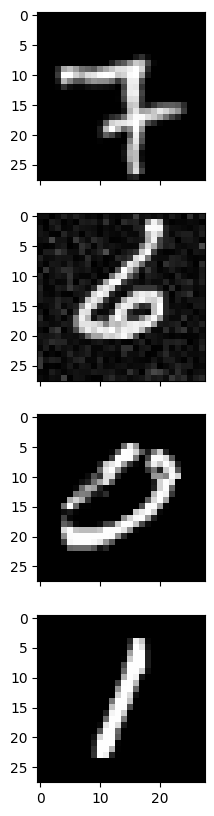

X_test samples: 


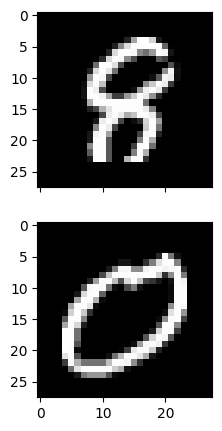

In [ ]:
#Data Understanding & Exploratory Data Analysis (EDA)
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import random
drive.mount('/content/drive')
#Load data
dataset = np.load('/content/drive/MyDrive/Colab Notebooks/interviewTask/data.npz')
#Explore dimension of data
print("X_train shape:")
print(dataset['X_train'].shape)
print("Y_train shape:")
print (dataset['y_train'].shape)
print("X_test shape:")
print (dataset['X_test'].shape)
print("y_test shape:")
print (dataset['y_test'].shape)
# Visualize a few samples from 'X_train' and 'X_test' to capture a sense on what the images look like
random_samples = []
for i in range(4):
  sample_index = random.randint(0, 67609)
  random_samples.append(sample_index)
fig, ax = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10,10))
i = 0
print("X_train samples: ")
for sample in random_samples:
  sample_image = dataset['X_train'][sample]
  ax[i].imshow(sample_image, cmap=plt.get_cmap("gray"))
  i += 1
plt.show()

random_samples = []
for i in range(2):
  sample_index = random.randint(0, 9999)
  random_samples.append(sample_index)
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(3,5))
i = 0
print("X_test samples: ")
for sample in random_samples:
  sample_image = dataset['X_test'][sample]
  ax[i].imshow(sample_image, cmap=plt.get_cmap("gray"))
  i += 1
plt.show()

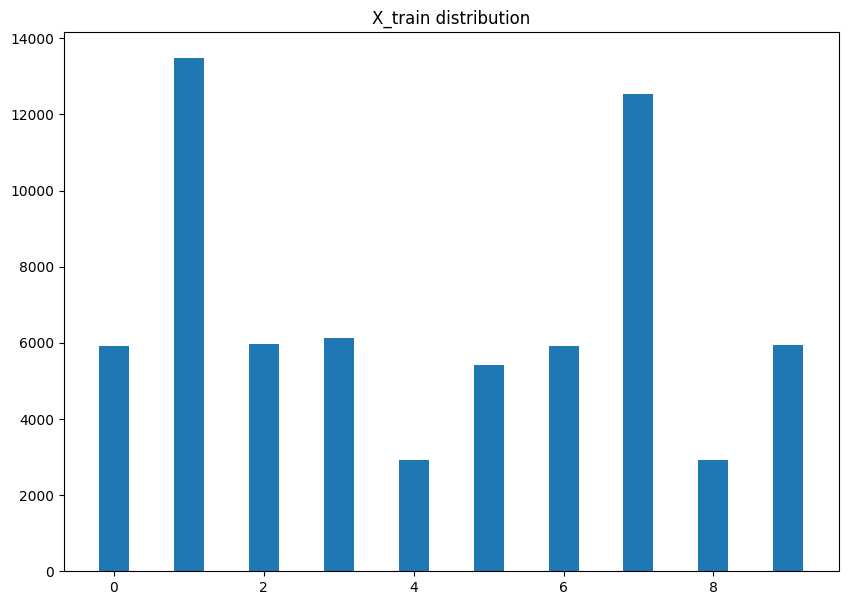

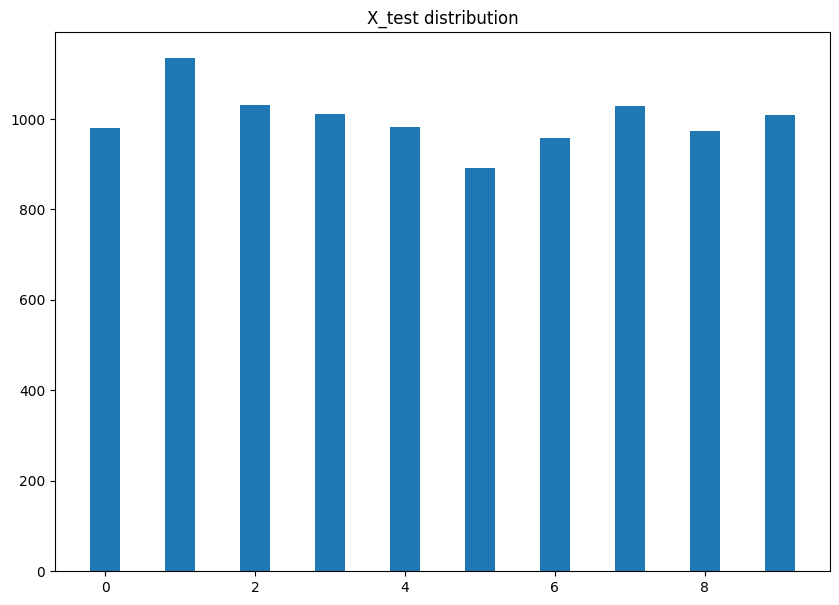

In [ ]:
# Visualize the distribution of classes in 'X_train' and 'X_test'
class_labels_train = np.unique(dataset['y_train'])
count_train = np.zeros((10,), dtype=int)
for cat in dataset['y_train']:
    cat = int(cat)
    count_train[cat]+=1
fig = plt.figure(figsize=(10, 7))
plt.bar(class_labels_train, count_train, width = 0.4)
plt.title("X_train distribution")
plt.show()
print("\n\n")
class_labels_test = np.unique(dataset['y_test'])
count_test = np.zeros((10,), dtype=int)
for cat in dataset['y_test']:
    cat = int(cat)
    count_test[cat]+=1
fig = plt.figure(figsize=(10, 7))
plt.bar(class_labels_test, count_test, width = 0.4)
plt.title("X_test distribution")
plt.show()

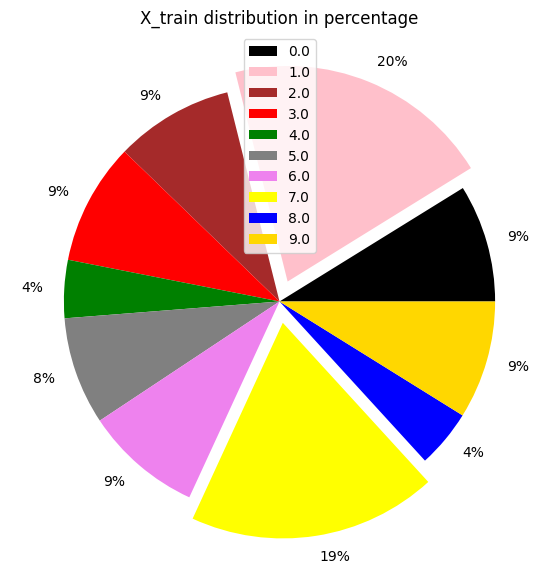

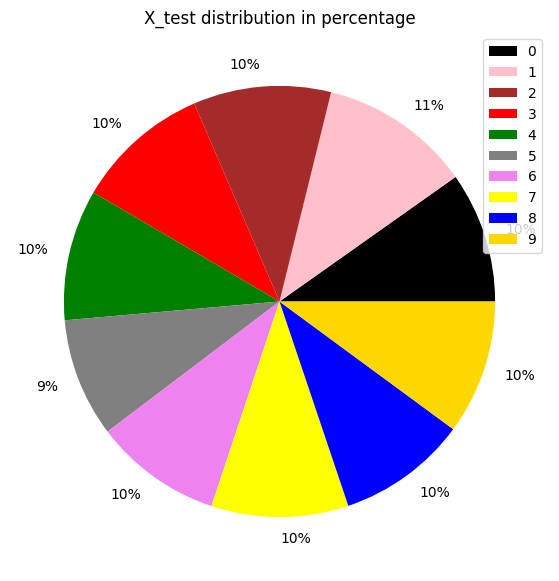

In [ ]:
# Visualize the distribution of classes in 'X_train' and 'X_test' in percentages
fig = plt.figure(figsize=(10, 7))
myExplode = [0, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0]
percentages = [100.0 * x / sum(count_train) for x in count_train]
fmt_str = "{:.0f}%"
percentages = [fmt_str.format(p) for p in percentages]
colors = ['black', 'pink', 'brown', 'red', 'green', 'gray', 'violet', 'yellow', 'blue', 'gold']
plt.pie(count_train, labels = percentages, explode = myExplode, colors=colors)
class_labels = [int(label) for label in class_labels_train]
plt.legend(class_labels_train)
plt.title("X_train distribution in percentage")
plt.show()
print("\n\n")
fig = plt.figure(figsize=(10, 7))
percentages = [100.0 * x / sum(count_test) for x in count_test]
fmt_str = "{:.0f}%"
percentages = [fmt_str.format(p) for p in percentages]
colors = ['black', 'pink', 'brown', 'red', 'green', 'gray', 'violet', 'yellow', 'blue', 'gold']
plt.pie(count_test, labels = percentages, colors=colors)
class_labels = [int(label) for label in class_labels_test]
plt.legend(class_labels_test)
plt.title("X_test distribution in percentage")
plt.show()

In [ ]:
#Explore the range of values
print("Maximum value of X_trian Matrices:")
print(dataset['X_train'].max())
print("Minimum value of X_trian Matrices:")
print(dataset['X_train'].min())
print("Maximum value of X_test Matrices:")
print(dataset['X_test'].max())
print("Minimum value of X_test Matrices:")
print(dataset['X_test'].min())

Maximum value of X_trian Matrices:
255.0
Minimum value of X_trian Matrices:
0.0
Maximum value of X_test Matrices:
255
Minimum value of X_test Matrices:
0


**Data Preprocessing**

1.   Data normalization
2.   Data reshaping





In [ ]:
from tensorflow import keras

#Seprate data
x_train = dataset['X_train']
y_train = dataset['y_train']
x_test = dataset['X_test']
y_test = dataset['y_test']
#Normalize data to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
#Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
#Do one hot encode on category values
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Model Building: CNN with weighted class


In [ ]:
from tensorflow.keras import layers

#Define cnn model (basic model)
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu", kernel_initializer='he_uniform'),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

batch_size = 128
epochs = 10
class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(dataset['y_train']), y = dataset['y_train'])
class_weights = [round(w, 2) for w in class_weights]
class_weights = dict(enumerate(class_weights))
model.compile(loss="categorical_crossentropy", optimizer="adam", weighted_metrics=["categorical_accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, class_weight=class_weights)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
525/525 [==============================] - 54s 100ms/step - loss: 0.0565 - categorical_accuracy: 0.9829
Epoch 2/10
525/525 [==============================] - 53s 100ms/step - loss: 0.0221 - categorical_accuracy: 0.9931
Epoch 3/10
525/525 [==============================] - 52s 99ms/step - loss: 0.0156 - categorical_accuracy: 0.9952
Epoch 4/10
525/525 [==============================] - 54s 103ms/step - loss: 0.0093 - categorical_accuracy: 0.9969
Epoch 5/10
525/525 [==============================] - 54s 103ms/step - loss: 0.0060 - categorical_accuracy: 0.9980
Epoch 6/10
525/525 [==============================] - 60s 113ms/step - loss: 0.0071 - categorical_accuracy: 0.9974
Epoch 7/10
525/525 [==============================] - 55s 105ms/step - loss: 0.0053 - categorical_accuracy: 0.9982
Epoch 8/10
525/525 [==============================] - 53s 100ms/step - loss: 0.0025 - categorical_accuracy: 0.9991
Epoch 9/10
525/525 [==============================] - 54s 103ms/step - loss: 0.00